# Importing MNIST Dataset

In the first section, the MNIST (Modified National Institute of Standards and Technology) data is imported into the project. This data set consists of a collection of handwritten digits which is the basis for training a machine learning system. The import is performed by the package torchvision. Package description: "The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision”.

In [11]:
import torch
import torchvision
import torchvision.datasets as datasets
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [13]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

len(mnist_trainset)

train_image_zero, train_target_zero = mnist_trainset[0];
train_image_zero.show();

# Visualizing the MNIST Dataset

The MNIST data is visualized in the following section. The 1st graph shows the images with the corresponding label. The 2nd graph shows the distribution of the data sorted by label. Here you can see that the distribution of the training data is very even.


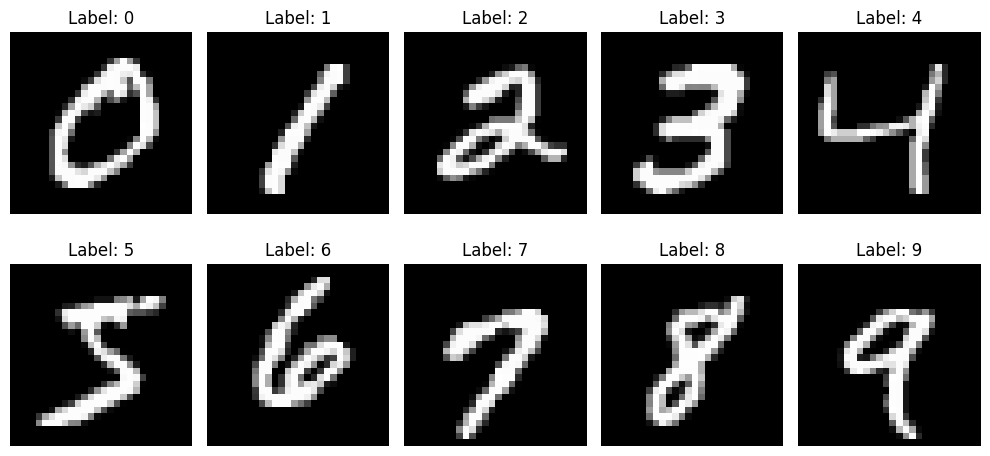

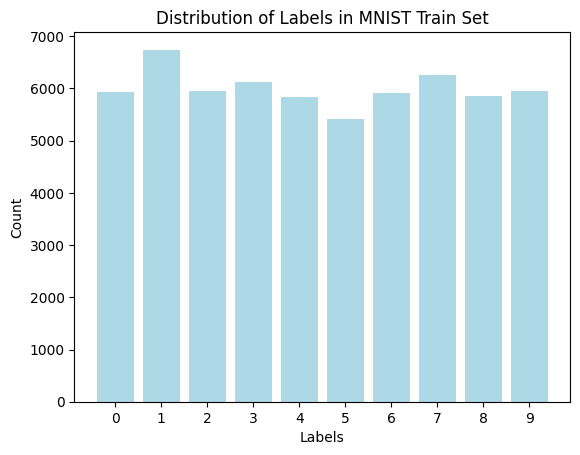

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
[(1, 6742), (7, 6265), (3, 6131), (2, 5958), (9, 5949), (0, 5923), (6, 5918), (8, 5851), (4, 5842), (5, 5421)]


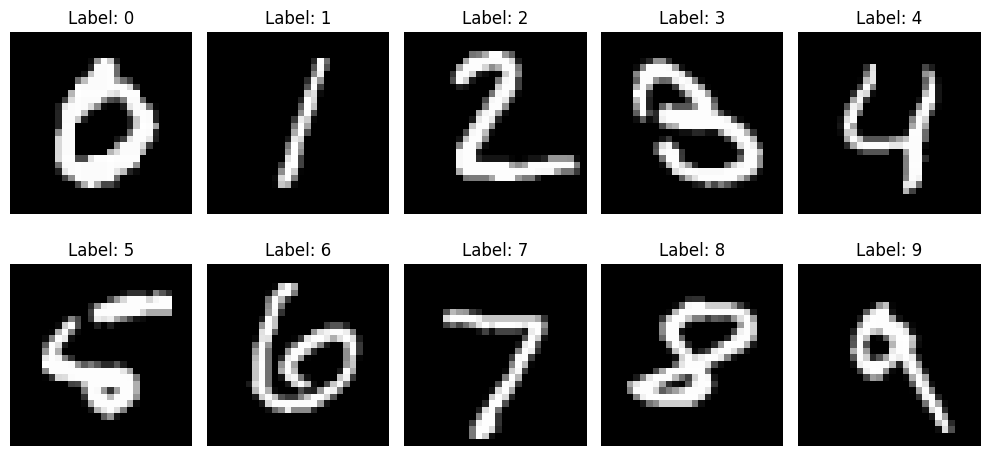

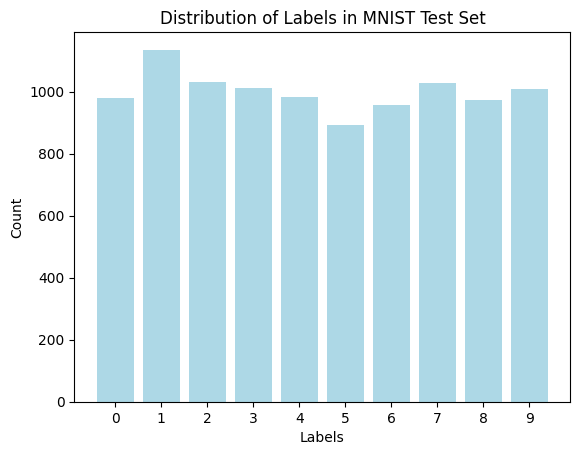

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
[(1, 1135), (2, 1032), (7, 1028), (3, 1010), (9, 1009), (4, 982), (0, 980), (8, 974), (6, 958), (5, 892)]


In [14]:
def visualize_dataset(dataset, title):
    label_counts = Counter()

    sample_images = {}

    for index, (image, label) in enumerate(dataset):
        label_counts[label] += 1
        if label not in sample_images:
            sample_images[label] = image

    fig, ax = plt.subplots(2, 5, figsize=(10, 5))
    ax = ax.ravel()
    for i in range(10):
        ax[i].imshow(sample_images[i], cmap='gray')
        ax[i].set_title(f'Label: {i}')
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

    labels, counts = zip(*sorted(label_counts.items(), key=lambda item: item[1], reverse=True))

    plt.bar(labels, counts, color='lightblue')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Distribution of Labels in MNIST ' + title)
    plt.xticks(labels)
    plt.show()

    print(label_counts)
    print(label_counts.most_common())

visualize_dataset(mnist_trainset, 'Train Set')
visualize_dataset(mnist_testset, 'Test Set')

# Mathematical concepts for the Assignment

### 1. Training Loop
*Explanation:* A training loop is a sequence of steps where the model learns: data goes through the model, the error is calculated, and parameters are adjusted.  
*Example:* An image of a "5" goes into the network. If it mistakenly predicts "3," the loop calculates the error and adjusts the weights so that it better recognizes "5" next time.

*Mathematics:*
- *Forward Pass:* $\hat{y} = f(X; \theta)$
- *Loss Calculation:* $L = \text{Loss}(\hat{y}, y)$
- *Backward Pass:* $\frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta}$
- *Update Parameters:* $\theta_{\text{new}} = \theta - \alpha \cdot \frac{\partial L}{\partial \theta}$

### 2. Neural Networks
*Explanation:* A neural network processes the image layer by layer, identifying features and eventually predicting a number.  
*Example:* The image of an "8" goes through the first layer, which detects certain features (like edges and lines), then through the next layer, which identifies more complex patterns, until the network outputs a high probability for "8."

*Mathematics:*
- *Layer 1:* $z_1 = W_1 \cdot x + b_1$
- *Layer 2:* $z_2 = W_2 \cdot z_1 + b_2$
- *Layer 3 (output):* $z_3 = W_3 \cdot z_2 + b_3$
- *Activation per Layer (using ReLU as an example):* $a_i = \text{ReLU}(z_i)$

### 3. Linear Layer
*Explanation:* A linear layer takes the pixel values of images and calculates a prediction value for each digit.  
*Example:* If an image of a "5" goes into the layer, it multiplies pixel values by weights and adds a "bias" (a constant) to estimate whether the number is "5" or another digit.

*Mathematics:*
- *Forward Propagation:* $Z = X \cdot W + B$
  - $X$ is the input matrix (shape: $N \times l$),
  - $W$ are weights (shape: $l \times O$),
  - $B$ is the bias vector (shape: $O$).

### 4. Activation Functions
*Explanation:* Activation functions like ReLU (Rectified Linear Unit) help the network learn complex patterns by creating non-linear relationships.  
*Example:* After a ReLU filter, an image of a "3" might only show positive pixel values, helping the model ignore the background and focus on the actual digit.

*Mathematics:*
- *ReLU (Rectified Linear Unit):* $\text{ReLU}(x) = \max(0, x)$
- *Sigmoid:* $\sigma(x) = \frac{1}{1 + e^{-x}}$
- *Softmax (used for probability distribution over classes):* $\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$

### 5. One-Hot Encoding
*Explanation:* One-hot encoding represents each digit as a vector with only one "1" in it.  
*Example:* If the image shows a "7," it is encoded as [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]. For a "3," it would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This allows the model to identify the digit clearly.

### 6. Loss Functions
*Explanation:* The loss function measures how far the network’s predictions are from the actual values.  
*Example:* If the model misclassifies an image of a "9" as a "4," the loss function shows a large error. For the MNIST dataset, categorical cross-entropy is commonly used, minimizing the error as much as possible.

*Mathematics:*
- *Mean Squared Error (MSE):* $\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}(x_i))^2$
- *Binary Cross-Entropy (BCE):* $\text{BCE}(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$
- *Categorical Cross-Entropy (CE):* $\text{CE}(y, \hat{y}) = - \sum_{i=1}^N y_i \log(\hat{y}_i)$

### 7. Hyperparameter Tuning
*Explanation:* This means trying different settings (like learning rate) to improve the model.  
*Example:* If the model learns too slowly, we can increase the learning rate. We test different rates and layer sizes until the model achieves the highest accuracy on test images.

*Mathematics:* Grid search or random search is commonly used to find optimal hyperparameters such as:
- *Learning Rate ($\alpha$)* – the step size during gradient descent.
- *Number of Hidden Layers* – additional layers in the network for better feature extraction.
  
### 8. Evaluation
*Explanation:* After training, evaluation checks how often the network correctly recognized digits.  
*Example:* "Accuracy" shows how many images were classified correctly. If the model reaches 95% accuracy, it means it recognized the correct digit in 95 out of 100 images.

*Mathematics:*
- *Accuracy:* $\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$
- *Precision:* $\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$
- *Recall:* $\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$
- *F1 Score:* $\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

### 9. Evaluating Training
*Explanation:* After each round of training (epoch), we compare the error for training and test images.  
*Example:* If the error decreases for training images but increases for test images, the model has "overfitted," meaning it memorized the training data but struggles with new images.

### 10. Histograms
*Explanation:* A histogram shows how often each digit appears in the dataset.  
*Example:* In the MNIST dataset, we might count how often each digit (0-9) appears and create a histogram. There may be 5000 "0s," 5000 "1s," and so on. This helps understand the distribution of digits.

*Mathematics:*  
Given digits $d$ from 0 to 9, count frequency per digit and plot:
- Frequency $= \text{count}(d_i)$ for each $i$ in [0, 9].

In [8]:
class LinearLayer:
    def __init__(self, input_dim, output_dim, learning_rate=0.01):
        # Initialize weights and bias
        self.W = np.random.rand(input_dim, output_dim)
        self.B = np.random.rand(output_dim)
        self.learning_rate = learning_rate

    def forward(self, X):
        # Compute the output: Z = X * W + B
        self.X = X
        self.Z = X @ self.W + self.B
        return self.Z

    def backward(self, dL_dZ):
        # Compute derivatives for the backward pass
        self.dL_dW = self.X.T @ dL_dZ
        self.dL_dB = np.sum(dL_dZ, axis=0)
        self.dL_dX = dL_dZ @ self.W.T
        return self.dL_dX

    def update_parameters(self):
        # Parameter update: θ_new = θ − α * ∂L/∂θ
        self.W -= self.learning_rate * self.dL_dW
        self.B -= self.learning_rate * self.dL_dB

In [9]:
# Unit tests
def test_linear_layer():
    # Fixed values for inputs, weights, and learning rate
    X_test = np.array([[1.0, 2.0], [3.0, 4.0]])
    W_test = np.array([[0.5, -0.5], [1.0, -1.0]])
    B_test = np.array([0.1, -0.2])
    learning_rate = 0.01
    dL_dZ_test = np.array([[0.5, -0.5], [0.5, -0.5]])

    # Instantiate the layer and set fixed parameters
    layer = LinearLayer(input_dim=2, output_dim=2, learning_rate=learning_rate)
    layer.W = W_test
    layer.B = B_test

    # Test forward pass
    Z_expected = X_test @ W_test + B_test
    Z_output = layer.forward(X_test)
    assert np.allclose(Z_output, Z_expected), "Forward pass error"

    # Test backward pass
    dL_dX_expected = dL_dZ_test @ W_test.T
    dL_dW_expected = X_test.T @ dL_dZ_test
    dL_dB_expected = np.sum(dL_dZ_test, axis=0)
    
    dL_dX_output = layer.backward(dL_dZ_test)
    assert np.allclose(dL_dX_output, dL_dX_expected), "Backward pass error in dL/dX"
    assert np.allclose(layer.dL_dW, dL_dW_expected), "Backward pass error in dL/dW"
    assert np.allclose(layer.dL_dB, dL_dB_expected), "Backward pass error in dL/dB"

    # Test parameter update
    W_updated_expected = W_test - learning_rate * dL_dW_expected
    B_updated_expected = B_test - learning_rate * dL_dB_expected

    layer.update_parameters()
    assert np.allclose(layer.W, W_updated_expected), "Update error in W"
    assert np.allclose(layer.B, B_updated_expected), "Update error in B"

    print("All tests passed!")

# Run tests
test_linear_layer()

All tests passed!


In [10]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01):
        self.layer1 = LinearLayer(input_dim, hidden_dim, learning_rate)
        self.layer2 = LinearLayer(hidden_dim, hidden_dim, learning_rate)
        self.layer3 = LinearLayer(hidden_dim, hidden_dim, learning_rate)
        self.output_layer = LinearLayer(hidden_dim, output_dim, learning_rate)

    def forward(self, X):
        self.Z1 = np.maximum(0, self.layer1.forward(X))  # ReLU activation
        self.Z2 = np.maximum(0, self.layer2.forward(self.Z1))  # ReLU activation
        self.Z3 = np.maximum(0, self.layer3.forward(self.Z2))  # ReLU activation
        self.output = self.softmax(self.output_layer.forward(self.Z3))
        return self.output

    def backward(self, dL_dY):
        dL_dZ3 = self.output_layer.backward(dL_dY)
        dL_dZ3[self.Z3 <= 0] = 0
        dL_dZ2 = self.layer3.backward(dL_dZ3)
        dL_dZ2[self.Z2 <= 0] = 0
        dL_dZ1 = self.layer2.backward(dL_dZ2)
        dL_dZ1[self.Z1 <= 0] = 0
        self.layer1.backward(dL_dZ1)

    def update_parameters(self):
        self.layer1.update_parameters()
        self.layer2.update_parameters()
        self.layer3.update_parameters()
        self.output_layer.update_parameters()

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / expZ.sum(axis=1, keepdims=True)

    def cross_entropy_loss(self, Y_pred, Y_true):
        n_samples = Y_true.shape[0]
        log_likelihood = -np.log(Y_pred[range(n_samples), Y_true.argmax(axis=1)])
        return np.sum(log_likelihood) / n_samples

    def compute_accuracy(self, Y_pred, Y_true):
        predictions = np.argmax(Y_pred, axis=1)
        labels = np.argmax(Y_true, axis=1)
        return np.mean(predictions == labels)

# Training Loop
def train_network(network, X_train, Y_train, X_test, Y_test, epochs=100, batch_size=32):
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train = X_train[indices]
        Y_train = Y_train[indices]

        # Mini-batch training
        for start in range(0, X_train.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            Y_batch = Y_train[start:end]

            # Forward pass
            Y_pred = network.forward(X_batch)

            # Compute loss and accuracy
            loss = network.cross_entropy_loss(Y_pred, Y_batch)
            accuracy = network.compute_accuracy(Y_pred, Y_batch)

            # Backward pass and parameter update
            dL_dY = Y_pred - Y_batch  # Derivative of loss with respect to predictions
            network.backward(dL_dY)
            network.update_parameters()

        # Evaluate on test data after each epoch
        Y_test_pred = network.forward(X_test)
        test_loss = network.cross_entropy_loss(Y_test_pred, Y_test)
        test_accuracy = network.compute_accuracy(Y_test_pred, Y_test)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Assuming X_train, Y_train, X_test, and Y_test are available
input_dim = 784  # For example, 28x28 images flattened
hidden_dim = 128
output_dim = 10  # 10 classes for digits 0-9
learning_rate = 0.01

network = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)
# Call train_network with training and test data.
# train_network(network, X_train, Y_train, X_test, Y_test)
